In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"D:\Data sets\Algerian_forest_fires_dataset_UPDATE.csv", header =1)

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### dividing the dataset as 2 dataset into 1 file with an additional column region with 0 for bejia region and 1 for sidi bel abbes region

In [8]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df = df.drop(122).reset_index(drop=True)

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### removing the white spaces from the column names

In [15]:
df.columns = df.columns.str.strip()

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [19]:
# change the required column as int datatype:

df[['month','year','Temperature','RH','Ws']] = df[['month','year','Temperature','RH','Ws']].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(5), object(9)
memory usage: 28.6+ KB


In [21]:
# changing the required columns to float data type

objects = [features for features in df.columns if df[features].dtypes =='O']

In [22]:
objects

['day', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [23]:
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(9), int64(5), object(1)
memory usage: 28.6+ KB


In [25]:
df['Region'] = df['Region'].astype(int)

In [26]:
df.to_csv('cleaned_df_algerian_fire.csv', index= False)

# EDA

In [27]:
# dropping unwanted columns

df_copy = df.drop(columns=['day', 'month', 'year'], axis = 1)

In [28]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
# encoding of category in classes:

df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [30]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [31]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [32]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [33]:
# plotting density plots for sll festures

import matplotlib.pyplot as plt

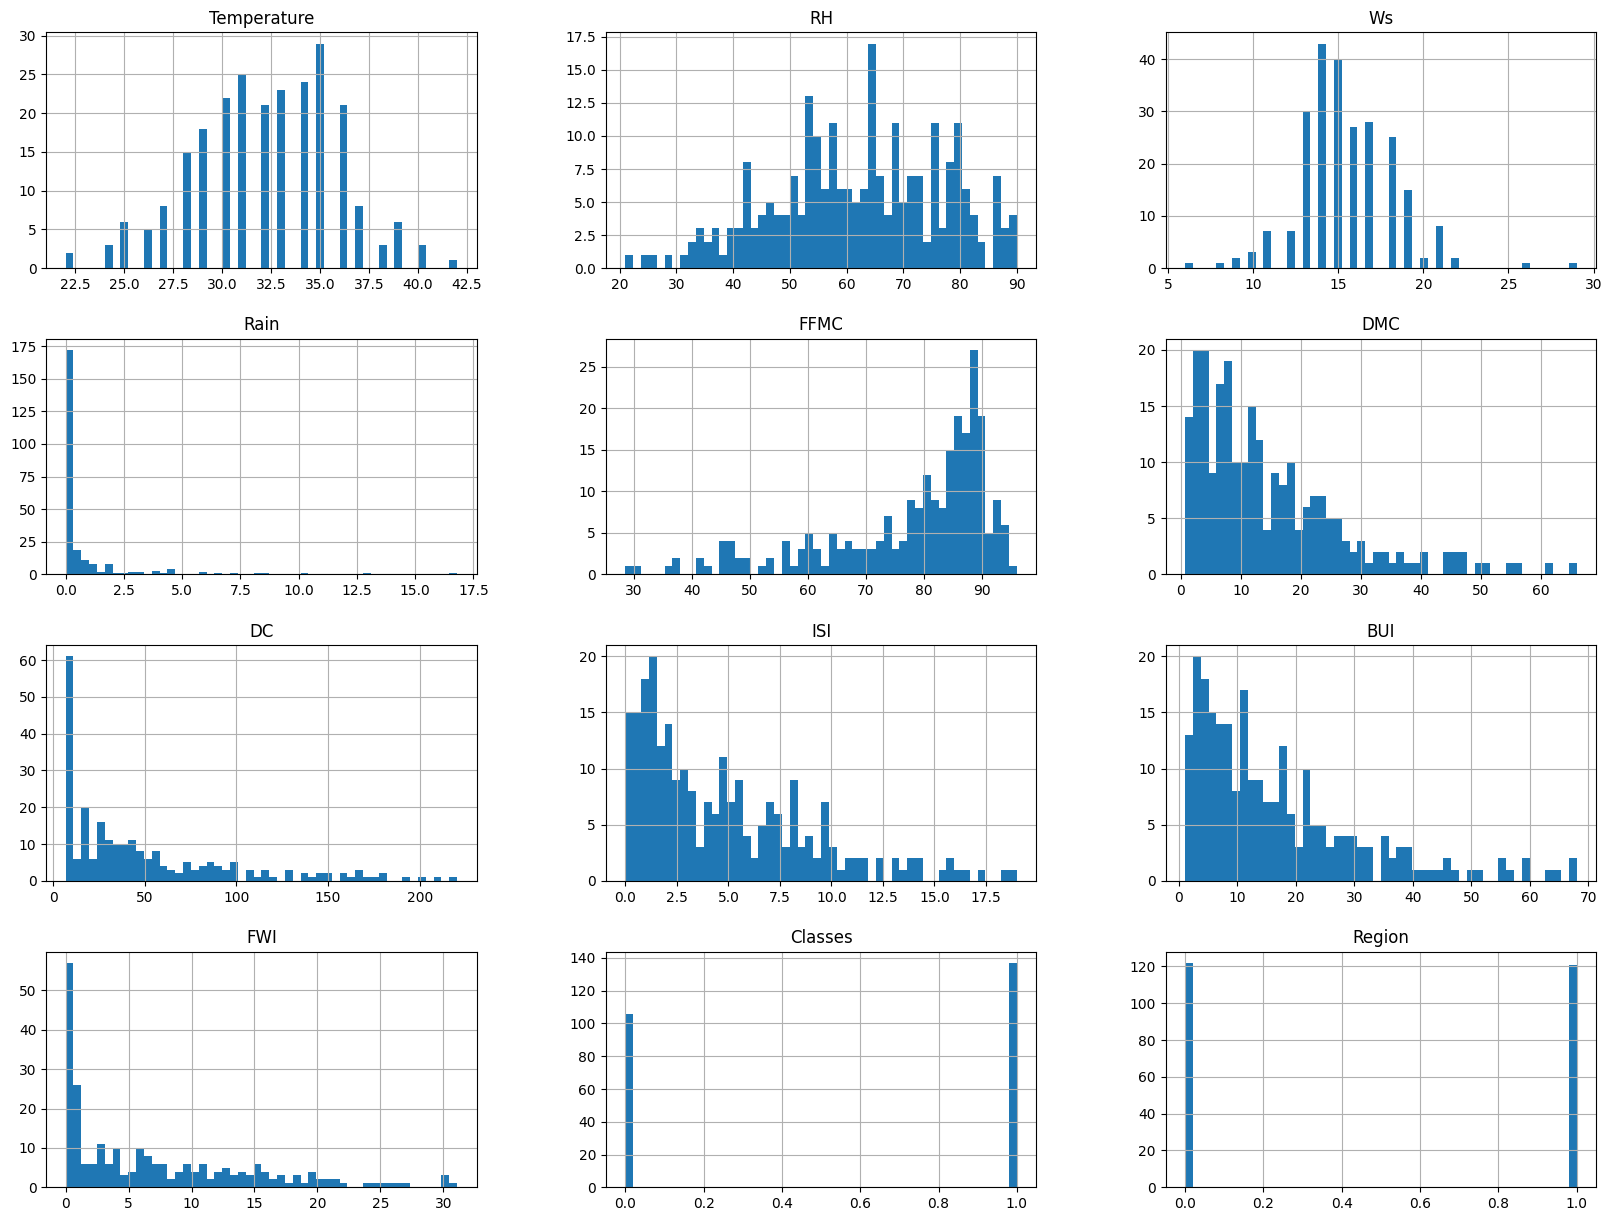

In [34]:
# plt.style.use('seaborn')
df_copy.hist(bins = 50, figsize= (20, 15))
plt.show()

In [35]:
# percentage for pie chart:

percenetage = df_copy['Classes'].value_counts(normalize=True)*100
percenetage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

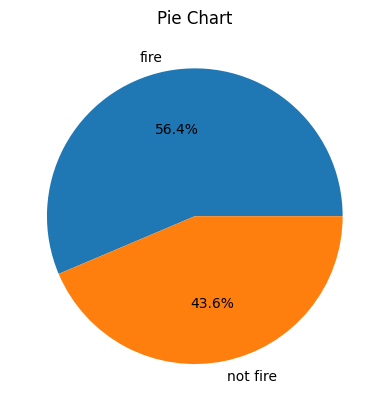

In [36]:
classlabels = ['fire', 'not fire']
plt.Figure(figsize= (12, 7))
plt.pie(percenetage, labels= classlabels, autopct= '%1.1f%%')
plt.title('Pie Chart')
plt.show()

In [37]:
# Correlation:
corr = df_copy.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Figure size 700x1500 with 0 Axes>

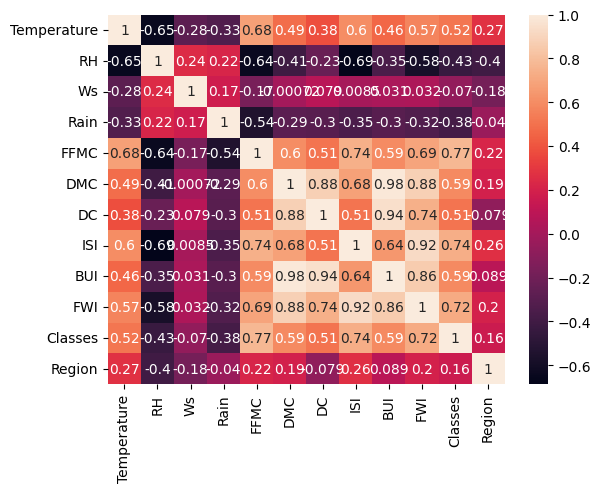

In [38]:
import seaborn as sns
sns.heatmap(corr, annot= True)
plt.Figure(figsize=(7, 15))

<Axes: ylabel='FWI'>

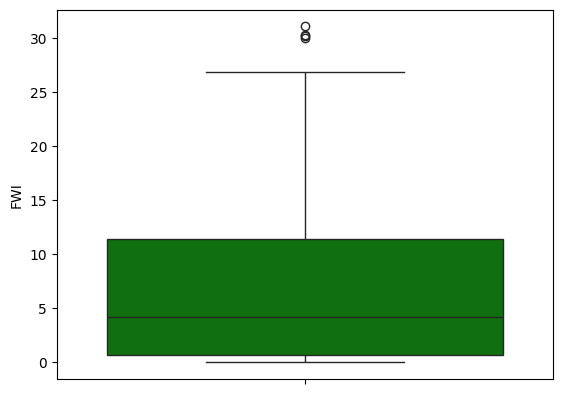

In [39]:
# box plots

sns.boxplot(df['FWI'], color= 'green')

In [40]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Bgia region Analysis')

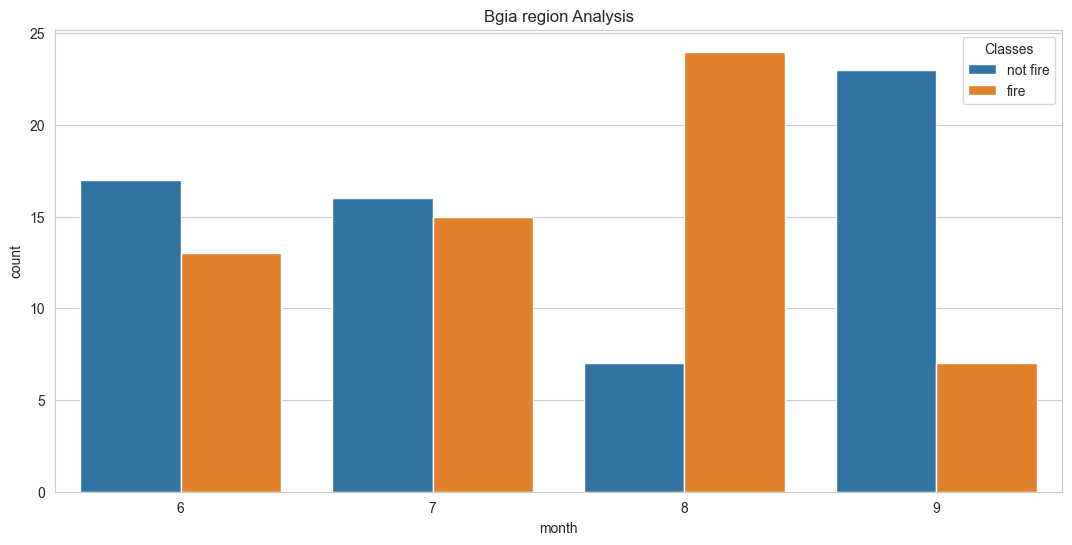

In [41]:
# monthly fire ana;ysis:

df_temp = df.loc[df['Region'] == 0]
plt.figure(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue= 'Classes', data= df_temp)
plt.title('Bgia region Analysis')

Text(0.5, 1.0, 'sidi bel abbis Analysis')

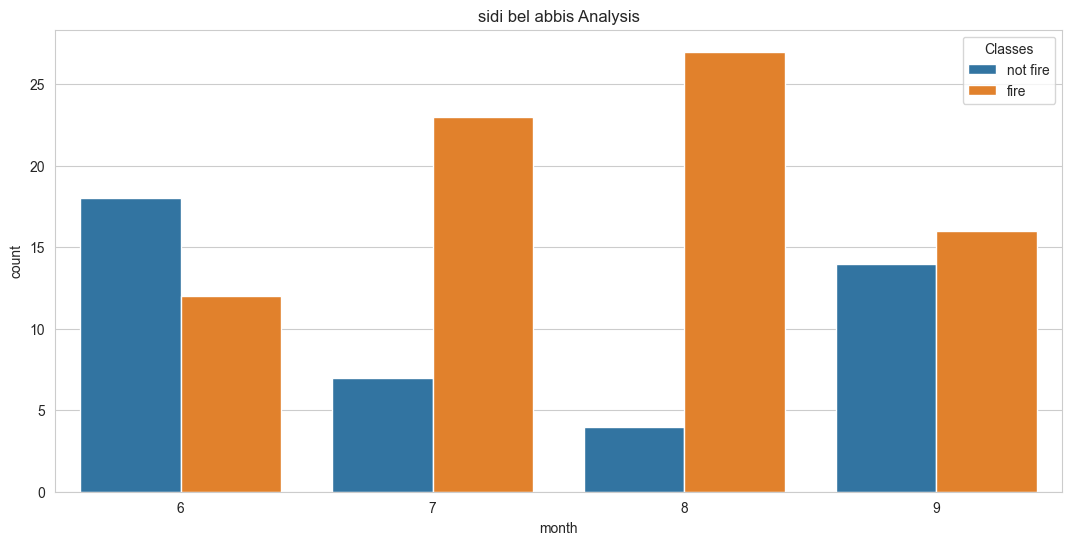

In [42]:
df_temp1 = df.loc[df['Region'] == 1]
plt.figure(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue= 'Classes', data= df_temp1)
plt.title('sidi bel abbis Analysis')

## Model Selection and Feature Selection

In [43]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [44]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [45]:
# independent and dependent features:

x = df_copy.drop('FWI', axis=1)
y = df_copy['FWI']

In [46]:
# train test split:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_yest = train_test_split(x, y, test_size= 0.20, random_state= 42)

In [47]:
x_train.shape

(194, 11)

In [48]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0
207,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,1,1
158,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,1,1
132,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,1,1
84,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


## Feature selection wth correlation

<Axes: >

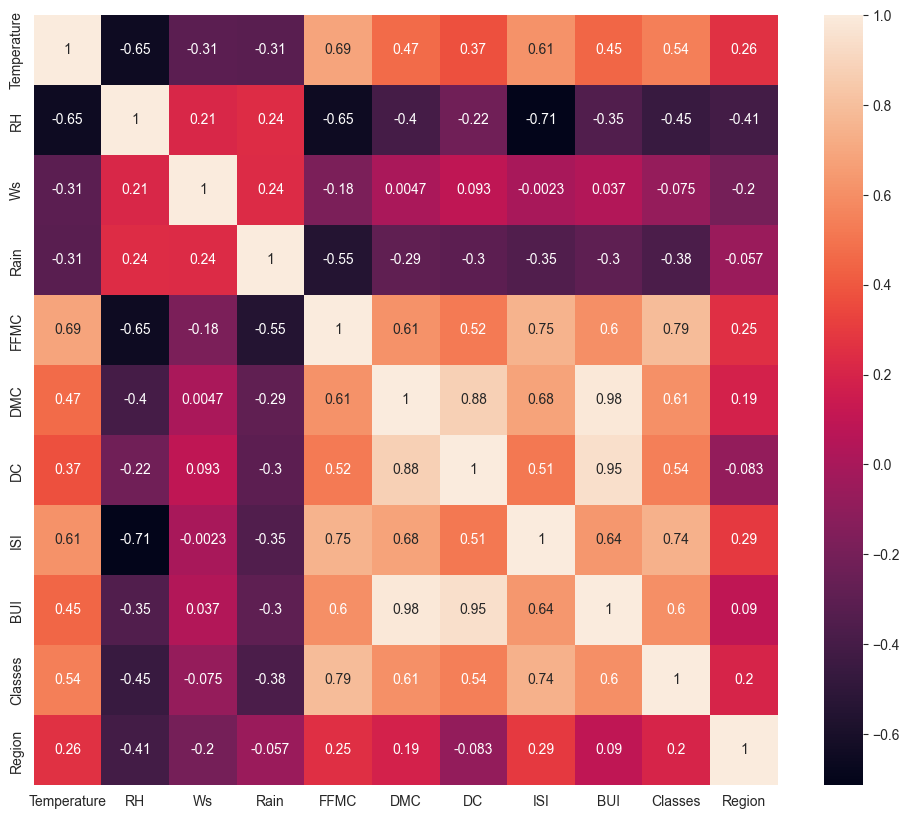

In [49]:
# check for multicolinearity:

plt.figure(figsize=(12, 10))
corr = x_train.corr()
sns.heatmap(corr, annot= True)

In [50]:
def correlation(dataset, thershold):

    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> thershold:
                columns = corr_matrix.columns[i]
                col_corr.add(columns)

    return col_corr

In [51]:
corr_feat = correlation(x_train, 0.85)

In [52]:
# dropping the features when correlation > 0.85
x_train.drop(corr_feat, axis=1, inplace= True) 
x_test.drop(corr_feat, axis=1, inplace= True) 

In [53]:
x_train.shape, x_test.shape

((194, 9), (49, 9))

## Feature Scaling or standardization

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
x_trained_scaler = scaler.fit_transform(x_train)
x_test_sclaer = scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

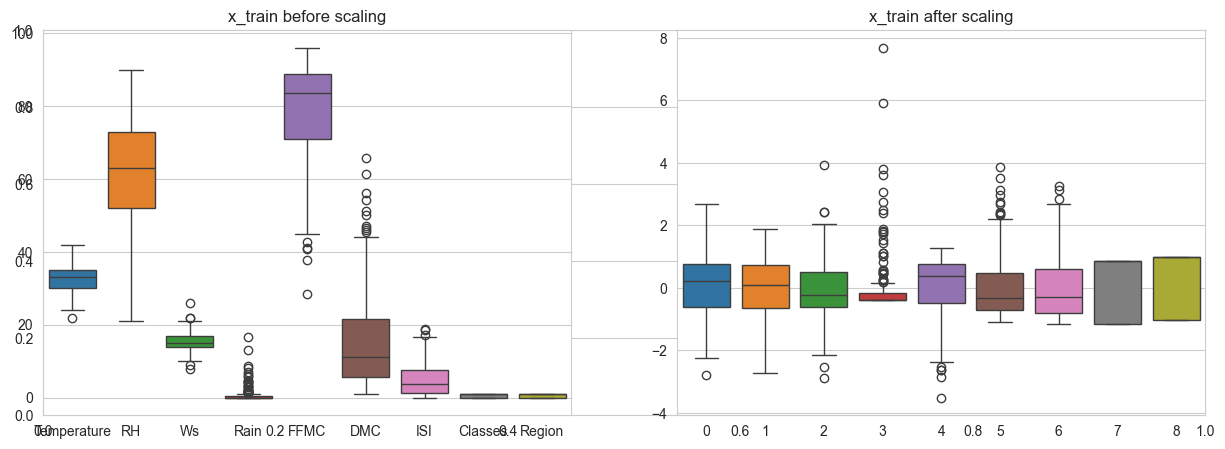

In [56]:
# box plots to understand standard sclaer:

plt.subplots(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('x_train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data = x_trained_scaler)
plt.title('x_train after scaling')

## Model Training

mae:  0.5882990110708648 r2 score:  0.9805895859259883


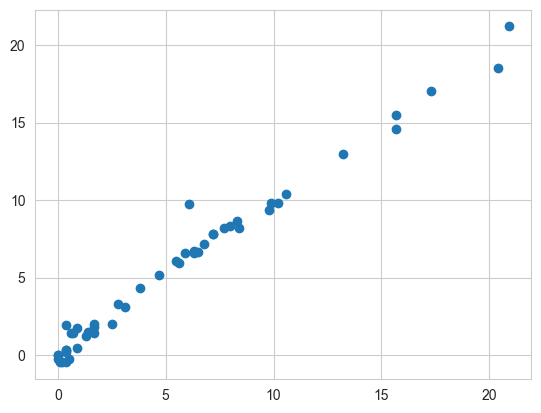

In [57]:
# Liner regression:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


liner = LinearRegression()
liner.fit(x_trained_scaler, y_train)
y_predict = liner.predict(x_test_sclaer)

mae =mean_squared_error(y_yest, y_predict)
score = r2_score(y_yest, y_predict)
print('mae: ',mae,'r2 score: ',score)

plt.scatter(y_yest, y_predict)

## Lasso Regression:

mae:  1.726042325023142 r2 score:  0.9430507350726562


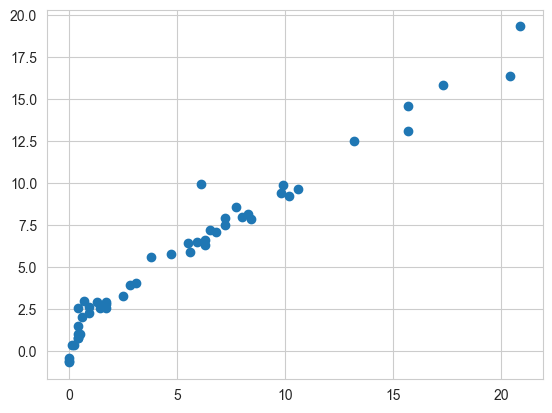

In [58]:
# lasso regression:

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


lasso = Lasso()
lasso.fit(x_trained_scaler, y_train)
y_predict = lasso.predict(x_test_sclaer)

mae =mean_squared_error(y_yest, y_predict)
score = r2_score(y_yest, y_predict)
print('mae: ',mae,'r2 score: ',score)

plt.scatter(y_yest, y_predict)

## ridge regression

mae:  0.6029616070548557 r2 score:  0.9801058063273602


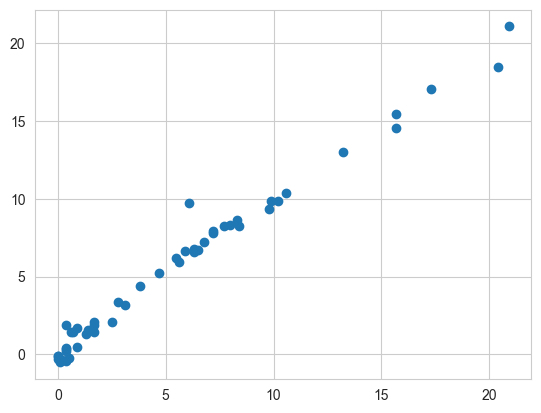

In [59]:
# lasso regression:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


ridge = Ridge()
ridge.fit(x_trained_scaler, y_train)
y_predict = ridge.predict(x_test_sclaer)

mae =mean_squared_error(y_yest, y_predict)
score = r2_score(y_yest, y_predict)
print('mae: ',mae,'r2 score: ',score)

plt.scatter(y_yest, y_predict)

## Elastic net

mae:  4.009921298441002 r2 score:  0.8676961352267807


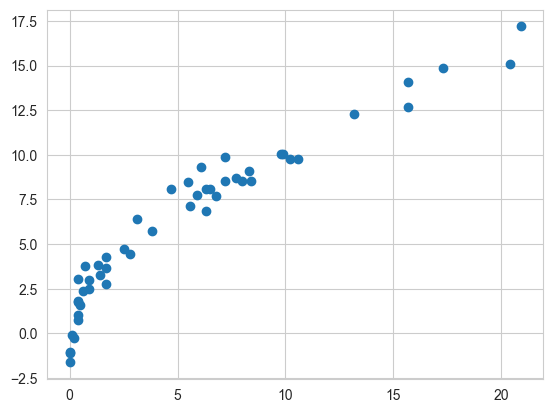

In [60]:
# elastic net  regression:

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


elastic = ElasticNet()
elastic.fit(x_trained_scaler, y_train)
y_predict = elastic.predict(x_test_sclaer)

mae =mean_squared_error(y_yest, y_predict)
score = r2_score(y_yest, y_predict)
print('mae: ',mae,'r2 score: ',score)

plt.scatter(y_yest, y_predict)

In [61]:
import pickle

In [62]:
# pickling scaler model:

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [63]:
# pickling ridge model:

with open('model.pkl', 'wb') as file:
    pickle.dump(ridge, file)